In [1]:
import requests
import bs4
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
from tqdm import tqdm

The extract_results function takes a pagenumber and city name as input, and returns a "soup" of HTML from the corresponding page. This function will be reused throughout the project. In order to collect location, company name, salary, and job title, I created functions that extract each piece of information from the HTML.  

In [6]:
def extract_results(page,city):
    url = f'http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={city}&start={page}'
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'html.parser')
    return soup

The company function extracts the name of the company of the job posting, and appends it to a list.

In [7]:
comp_list = []

def company(soup):
    divs = soup.find_all('div',class_='job_seen_beacon')
    for div in divs:
        try:
            comp_list.append(div.find('span',class_='companyName').text)
        except:
            comp_list.append(np.nan)
    return print(comp_list)

j = extract_results(10,"Austin")

company(j)

['Signature Science, LLC', 'eBay Inc.', 'Arrive Logistics', 'Dell Technologies', 'Frontdoor', 'National Instruments', 'Facebook App', 'S&P Global', 'Xylem', 'KWx', 'Deloitte', 'IBM', 'Silicon Valley Bank', 'Salesforce', 'Deloitte']


Getting Location

In [8]:
loc_list = []

def location(soup):
    divs = soup.find_all('div',class_='job_seen_beacon')
    for div in divs:
        try:
            loc_list.append(div.find('div',class_='companyLocation').text)
        except:
            loc_list.append(np.nan)
    return loc_list

j = extract_results(10,"Austin")

location(j)

['Austin, TX',
 'Austin, TX 78759 (North Shoal Creek area)',
 'Remote in Austin, TX+2 locations',
 'Hybrid remote in Austin, TX',
 'Austin, TX 73301 (St Edwards area)+2 locations',
 'Austin, TX+9 locations',
 'Remote in Austin, TX',
 'Austin, TX',
 'Austin, TX+1 location',
 'Austin, TX 73301 (St Edwards area)',
 'Austin, TX 78745',
 'Austin, TX',
 'Austin, TX+4 locations',
 'Austin, TX',
 'Austin, TX+1 location']

Getting Job Titles

In [9]:
job_list= []

def job(soup):
    divs = soup.find_all('div',class_='job_seen_beacon')
    for div in divs:
        try:
            job_list.append(div.find('h2').text)
        except:
            job_list.append(np.nan)

    return job_list

j = extract_results(10,"Austin")

job(j)

['Senior Data Scientist',
 'Bioinformatics Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist, Watson Health',
 'newData Science Advisor',
 'Data Scientist (100% Remote)',
 'Data Scientist',
 'Lead Data Scientist',
 'Senior Data Scientist',
 'Data Scientist- KWRI',
 'Senior Data Scientist Alteryx',
 'Data Scientist',
 'Product Analyst/Data Scientist',
 'newJunior Data Engineer']

Getting Salary - The majority of job postings had no salary information available

In [10]:
salary_list= []

def salary(soup):
    divs = soup.find_all('div',class_='job_seen_beacon')
    for div in divs:
        try:
            salary_list.append(div.find('div',class_='metadata salary-snippet-container').text)
        except:
            salary_list.append("No Salary Info")
            
    return salary_list

j = extract_results(10,"Austin")

salary(j)

['No Salary Info',
 'No Salary Info',
 'No Salary Info',
 'No Salary Info',
 'No Salary Info',
 'No Salary Info',
 'No Salary Info',
 'No Salary Info',
 '$74 an hour',
 '$127,600 a year',
 'No Salary Info',
 'No Salary Info',
 'No Salary Info',
 '$82,400 a year',
 'No Salary Info']

I can then combine the 4 lists into a dataframe. This example is the first page in Austin.

In [11]:
df = pd.DataFrame({'Company': comp_list,
                     'Title': job_list,
                     'Location': loc_list,
                     'Salary': salary_list})
df.head()

,Company,Title,Location,Salary
0,"Signature Science, LLC",Senior Data Scientist,"Austin, TX",No Salary Info
1,eBay Inc.,Bioinformatics Data Scientist,"Austin, TX 78759 (North Shoal Creek area)",No Salary Info
2,Arrive Logistics,Data Scientist,"Remote in Austin, TX+2 locations",No Salary Info
3,Dell Technologies,Data Scientist,"Hybrid remote in Austin, TX",No Salary Info
4,Frontdoor,"Data Scientist, Watson Health","Austin, TX 73301 (St Edwards area)+2 locations",No Salary Info


This can be scaled up by iterating over a list of cities and page numbers to collect jobs from different cities across the United States

In [ ]:
placeholder = extract_results(10,"Chicago")

comp_list = []
loc_list= []
salary_list = []
job_list = []

cities = ['New+York', 'Chicago', 'San+Francisco','Austin','Seattle','San+Diego'
          'Los+Angeles', 'Philadelphia', 'Atlanta', 'Dallas','Houston','Baltimore','Denver',
         'Miami','Portland','Phoenix','Las+Vegas','Boston','Charlotte','Indianapolis','Nashville','Washington']
pages = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170]

for city in cities:
    for page in pages:
        c = extract_results(page,city)
        placeholder.body.append(c)

After dropping duplicates, I ended up with information on about 7000 jobs. Since I was only interested in jobs with salary information, I dropped all jobs that didn't contain a salary. This left me with 300 job postings.

In [22]:
df = pd.read_csv("out.csv",low_memory=False)

In [23]:
df.head()

,Company,Title,Location,Salary
0,Salesforce,Applied Scientist,"Chicago, IL 60654 (River North area)","$82,400 a year"
1,InspiHER Tech,DATA SCIENTIST,"Chicago, IL","$75,000 - $100,000 a year"
2,Lightyear Health,Data Scientist,New York State•Remote,"$90,000 - $110,000 a year"
3,CKM Analytix,Senior Data Scientist,"New York, NY 10018 (Garment District area)•Tem...","$100,000 - $180,000 a year"
4,NYC Careers,ASSOCIATE DATA SCIENTIST,"Manhattan, NY","$71,707 - $82,463 a year"


The data needed to be cleaned for modelling

In [24]:
# using lambda function to remove the dollar symbols, and the words "from" and "up to"
df['Salary'] = df['Salary'].map(lambda x: x.lstrip('$').rstrip('a year'))

df['Salary'] = df['Salary'].str.replace('$', '')
df['Salary'] = df['Salary'].str.replace(',', '')
df['Salary'] = df['Salary'].str.replace('From', '')
df['Salary'] = df['Salary'].str.replace('Up to', '')

df.Salary.head(8)

/var/folders/k8/t2sgh_ls3y7dl79tkl6792lm0000gn/T/ipykernel_759/376332570.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Salary'] = df['Salary'].str.replace('$', '')


0              82400
1     75000 - 100000
2     90000 - 110000
3    100000 - 180000
Name: Salary, dtype: object

In [25]:
# Function that splits the salaries on a -, and returns
# the mean of the two numbers.
def salary_fixer(x):
    if '-' in x:
        a,b = x.split('-', 1)
        return (int(a)+int(b))/2
    else:
        return x

In [26]:
df['Salary'] = df['Salary'].apply(salary_fixer)
df['Salary'] = df.Salary.astype('int64')
df.Salary.mean()

115270.19928825623

In [27]:
df.Salary.head(8)

0     82400
1     87500
2    100000
3    140000
4     77085
5    147500
6     85132
7     85132
Name: Salary, dtype: int64

The clean dataframe was then saved to a csv.

In [2]:
salaries = pd.read_csv("clean_salaries.csv")

In [3]:
salaries['Salary'].median()

115000.0

In order to classify salaries as being either High, or Low, A new coloumn is created which will serve as the target variable when modelling.

In [4]:
salaries['binary'] = salaries['Salary']

In [5]:
# 1 if above the median (115,000 usd), 0 if below.
def binary_extractor(x):
    if x>salaries.Salary.median():
        return 1
    else: 
        return 0
salaries['binary'] = salaries['binary'].apply(binary_extractor)

In [6]:
# this will be the baseline accuracy of our model, 
# which is naturally about 50% since we took the median
salaries.binary.value_counts(normalize=True)

0    0.508897
1    0.491103
Name: binary, dtype: float64

In [7]:
# Cleaning the location feature, organizing it by state.
def location_cleaner(x):
    if 'Maryland' in x:
        return 'MD'
    if 'Texas' in x:
        return 'TX'
    if 'Washington' in x:
        return 'WA'
    if 'OR' in x:
        return 'OR'
    if 'NY' in x:
        return 'NY'
    if 'New York' in x:
        return 'NY'
    if 'IL' in x:
        return 'IL'
    if 'CO' in x:
        return 'CO'
    if 'MI' in x:
        return 'MI'
    if 'TX' in x:
        return 'TX'
    if 'CA' in x:
        return 'CA'
    if 'GA' in x:
        return 'GA'
    if 'FL' in x:
        return 'FL'
    if 'PA' in x:
        return 'PA'
    if 'UT' in x:
        return 'UT'
    if 'MA' in x:
        return 'MA'
    if 'WA' in x:
        return 'WA'
    if 'MD' in x:
        return 'MD'
    if 'AZ' in x:
        return 'AZ'
    if 'MO' in x:
        return 'MO'
    if 'NC' in x:
        return 'NC'
    if 'TN' in x:
        return 'TN'
    if 'IN' in x:
        return 'IN'
    if 'OK' in x:
        return 'OK'
    if 'DE' in x:
        return 'DE'
    if 'OH' in x:
        return 'OH'
    if 'Colorado' in x:
        return 'CO'
    if 'United States' in x:
        return 'Remote'
    else:
        return x

salaries['Location'] = salaries['Location'].apply(location_cleaner)

In [8]:
salaries

,Company,Title,Location,Salary,binary
0,Salesforce,Applied Scientist,IL,82400,0
1,InspiHER Tech,DATA SCIENTIST,IL,87500,0
2,Lightyear Health,Data Scientist,NY,100000,0
3,CKM Analytix,Senior Data Scientist,NY,140000,1
4,NYC Careers,ASSOCIATE DATA SCIENTIST,NY,77085,0
...,...,...,...,...,...
276,Amazon.com Services LLC,Machine Learning Engineer II,CO,120700,1
277,"Stefanini, Inc",newMachine Learning (ML),MI,140000,1
278,aThingz Inc.,Senior Data Scientist,MI,90000,0
279,Boys & Girls Clubs of Southeastern Michigan,Fall 2021 Data Science Industry Club Fellowship,MI,116100,1


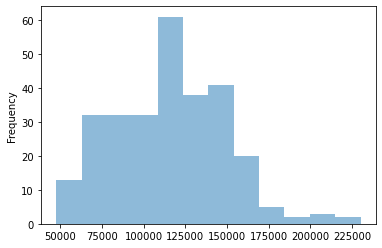

In [20]:
#distribution of salaries
ax = salaries['Salary'].plot.hist(bins=12, alpha=0.5)

Using NLP, I investigated what effect words in the job title have on salary.

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
import re

In [12]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    return text

cvec = CountVectorizer(preprocessor=preprocess_text,max_features=20,stop_words="english")
    
text = salaries['Title'].tolist()

cvec.fit(text)

document_matrix = cvec.transform(text)

By converting the sparse matrix into an array, and using a dataframe to visualize it, we can see how frequently the 20 most common words appear in the job postings. We can use this dataframe as input into a model that predicts weather a salary is high or low.

In [14]:
text_df = pd.DataFrame(document_matrix.toarray(),
                  columns=cvec.get_feature_names_out())

text_df.transpose().sort_values(0, ascending=False).transpose()

,scientist,ai,analyst,sr,software,senior,science,research,opportunities,newsenior,nationwide,ml,manager,machine,learning,lead,ii,engineer,data,statistician
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0
277,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
278,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
279,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

y = salaries['binary']
X = text_df

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.5, random_state=1)

log_model = LogisticRegression(solver='saga')
log_model.fit(X_train,y_train)
cross_val_score(log_model, X_test, y_test, cv=4).mean()

0.6948412698412698

The model scores much higher than baseline with a mean cross validation score of ≈ 0.70

In [34]:
log_model.predict_proba(X[1:10])

array([[0.47000704, 0.52999296],
       [0.47000704, 0.52999296],
       [0.26087963, 0.73912037],
       [0.47000704, 0.52999296],
       [0.26087963, 0.73912037],
       [0.47000704, 0.52999296],
       [0.92542437, 0.07457563],
       [0.47000704, 0.52999296],
       [0.32899055, 0.67100945]])

In [32]:
salaries[1:10]

,Company,Title,Location,Salary,binary
1,InspiHER Tech,DATA SCIENTIST,IL,87500,0
2,Lightyear Health,Data Scientist,NY,100000,0
3,CKM Analytix,Senior Data Scientist,NY,140000,1
4,NYC Careers,ASSOCIATE DATA SCIENTIST,NY,77085,0
5,Dataworks,Senior Data Scientist,NY,147500,1
6,NYC Careers,Data Scientist - Policy Analytics,NY,85132,0
7,NYC Careers,"newCity Research Scientist II / Data Analyst, ...",NY,85132,0
8,Fund For Public Health In New York Inc,Data Scientist,NY,90000,0
9,Purpose,"newData Analytics / Data Science Lead, Impact ...",NY,100000,0


An inital look at the probabilites in the model's predictions suggests that the word "senior" makes the model highly confident that the salary is high, and the world "analyst" appears to have the inverse effect. 

Extracting model coefficients confirms this hypothesis. 

In [35]:
importance_nlp = pd.DataFrame(log_model.coef_[0], columns=['coefs'])
importance_nlp['words'] = X.columns
importance_nlp.reindex(importance_nlp.coefs.abs().sort_values(ascending=False).index).head(7)

,coefs,words
1,-2.031257,analyst
5,1.179445,lead
6,1.086552,learning
13,-0.993648,research
16,0.921286,senior
18,0.823026,sr
17,-0.668121,software


Using NLP I found that the words "analyst" and "research" in a job title were the most likely to indicate a low salary, whereas "lead","senior", and "machine learning" were most likely to indicate a High Salary. These findings are understandable, as analyst and research were terms that appeared in more entry level jobs with lower pay, and a lead/senior at a company would naturally expect to be paid a higher salary.